# ROC (Receiver Operating Characteristic)

- A __receiver operating characteristic__ curve, or __ROC__ curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as __its discrimination threshold is varied__.

- The ROC curve is created by plotting the __true positive rate (TPR)__ against the __false positive rate (FPR)__ at various threshold settings. You can calculate TPR & FPR using Confusion Matrix.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [4]:
data = {
    'x': np.arange(1, 11),
    'y': np.hstack((np.zeros(5), np.ones(5)))
}
df = pd.DataFrame(data)
df.head()

,x,y
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


<hr>

### Contoh kasus pada Logistic Regression

In [5]:
model = LogisticRegression(solver='lbfgs')
model.fit(df[['x']], df['y'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
model.predict_proba(df[['x']])
# [probability prediksi = 0, probability prediksi = 1]

array([[0.99521278, 0.00478722],
       [0.98449561, 0.01550439],
       [0.95096786, 0.04903214],
       [0.85557365, 0.14442635],
       [0.64405337, 0.35594663],
       [0.35594659, 0.64405341],
       [0.14442632, 0.85557368],
       [0.04903213, 0.95096787],
       [0.01550439, 0.98449561],
       [0.00478721, 0.99521279]])

In [7]:
df['proba'] = model.predict_proba(df[['x']])[:,1]
df

,x,y,proba
0,1,0.0,0.004787
1,2,0.0,0.015504
2,3,0.0,0.049032
3,4,0.0,0.144426
4,5,0.0,0.355947
5,6,1.0,0.644053
6,7,1.0,0.855574
7,8,1.0,0.950968
8,9,1.0,0.984496
9,10,1.0,0.995213


In [8]:
# membuat prediksi y" dengan threshold berbeda: 0.1 - 0.9
df['y"0.1'] = df['proba'].apply(lambda x: 1 if (x > 0.1) else 0)
df['y"0.2'] = df['proba'].apply(lambda x: 1 if (x > 0.2) else 0)
df['y"0.3'] = df['proba'].apply(lambda x: 1 if (x > 0.3) else 0)
df['y"0.4'] = df['proba'].apply(lambda x: 1 if (x > 0.4) else 0)
df['y"0.5'] = df['proba'].apply(lambda x: 1 if (x > 0.5) else 0)
df['y"0.6'] = df['proba'].apply(lambda x: 1 if (x > 0.6) else 0)
df['y"0.7'] = df['proba'].apply(lambda x: 1 if (x > 0.7) else 0)
df['y"0.8'] = df['proba'].apply(lambda x: 1 if (x > 0.8) else 0)
df['y"0.9'] = df['proba'].apply(lambda x: 1 if (x > 0.9) else 0)
df

,x,y,proba,"y""0.1","y""0.2","y""0.3","y""0.4","y""0.5","y""0.6","y""0.7","y""0.8","y""0.9"
0,1,0.0,0.004787,0,0,0,0,0,0,0,0,0
1,2,0.0,0.015504,0,0,0,0,0,0,0,0,0
2,3,0.0,0.049032,0,0,0,0,0,0,0,0,0
3,4,0.0,0.144426,1,0,0,0,0,0,0,0,0
4,5,0.0,0.355947,1,1,1,0,0,0,0,0,0
5,6,1.0,0.644053,1,1,1,1,1,1,0,0,0
6,7,1.0,0.855574,1,1,1,1,1,1,1,1,0
7,8,1.0,0.950968,1,1,1,1,1,1,1,1,1
8,9,1.0,0.984496,1,1,1,1,1,1,1,1,1
9,10,1.0,0.995213,1,1,1,1,1,1,1,1,1


### Note

- By default, nilai threshold logistic regression = 0.5. Jika probability >0.5, maka diprediksi 1 & sebaliknya jika probability <0.5, diprediksi 0.

- Lihat prediksi untuk threshold = 0.5, nilainya sama persis sesuai data aktual.

<hr>

### Plot ROC Curve

- Untuk membuat ROC curve, dapat melalui confusion matrix untuk setiap prediksi (variasi threshold).

- Kemudian diplot nilai x __FPR (False Positive Rate)__ vs nilai y __TPR (True Positif Rate)__.

In [9]:
from sklearn.metrics import confusion_matrix

roc = []

for i in range(1, 10):
    # print(f'y"0.{i}')
    
    tn, fp, fn, tp = confusion_matrix(df['y'], df[f'y"0.{i}']).ravel()
    # print(tn, fp, fn, tp)

    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)
    print(fpr, tpr)
    
    roc.append([fpr, tpr])

0.4 1.0
0.2 1.0
0.2 1.0
0.0 1.0
0.0 1.0
0.0 1.0
0.0 0.8
0.0 0.8
0.0 0.6


In [10]:
roc = np.array(roc)
roc

array([[0.4, 1. ],
       [0.2, 1. ],
       [0.2, 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 1. ],
       [0. , 0.8],
       [0. , 0.8],
       [0. , 0.6]])

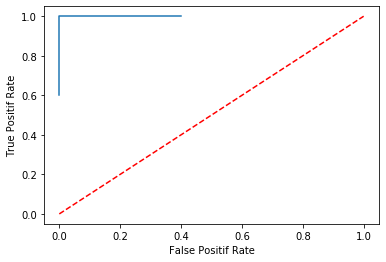

In [11]:
plt.plot(roc[:, 0], roc[:, 1])
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positif Rate')
plt.ylabel('True Positif Rate')
plt.show()

- Nilai threshold terbaik adalah yang memiliki FPR terendah, dengan TPR tertinggi.

- Dari plot di atas diketahui titik dg threshold terbaik adalah (0, 1), yang memiliki treshold 0.4, 0.5 & 0.6.

- Dari dataset juga diketahui bahwa threshold 0.4, 0.5 & 0.6 memiliki y prediksi yang sama dengan y aktual.

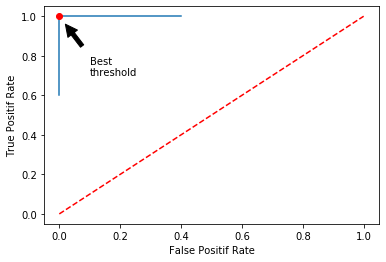

In [12]:
plt.plot(roc[:, 0], roc[:, 1])
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(0, 1, 'ro')

plt.annotate('Best\nthreshold', xy=(0, 1), xytext=(0.1, 0.7),
    arrowprops=dict(facecolor='black', shrink=0.2),
    # arrowprops = dict(arrowstyle = '<|-')
)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positif Rate')
plt.ylabel('True Positif Rate')
plt.show()

<hr>

### ROC AUC Score

- Hitung manual = luas AUC (Area Under Curve) a.k.a area di bawah ROC curve

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score

Text(0, 0.5, 'True Positif Rate')

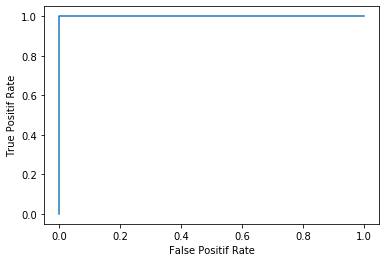

In [22]:
# plot ROC curve
fpr, tpr, threshold = roc_curve(df['y'], model.predict_proba(df[['x']])[:,1])

plt.plot(fpr, tpr, label=f'Threshold: {threshold}')
plt.xlabel('False Positif Rate')
plt.ylabel('True Positif Rate')

In [21]:
# ROC AUC score = luas AUC
roc_auc_score(df['y'], model.predict(df[['x']]))

1.0